In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
salaries = pd.read_csv('./files/Salaries.csv')
schools = pd.read_csv('./files/Schools.csv')
college = pd.read_csv('./files/CollegePlaying.csv')

In [6]:
schools.head()

,schoolID,name_full,city,state,country
0,abilchrist,Abilene Christian University,Abilene,TX,USA
1,adelphi,Adelphi University,Garden City,NY,USA
2,adrianmi,Adrian College,Adrian,MI,USA
3,akron,University of Akron,Akron,OH,USA
4,alabama,University of Alabama,Tuscaloosa,AL,USA


In [7]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [8]:
college.head()

,playerID,schoolID,yearID
0,aardsda01,pennst,2001
1,aardsda01,rice,2002
2,aardsda01,rice,2003
3,abadan01,gamiddl,1992
4,abadan01,gamiddl,1993


schools and salary related?

In [9]:
salaries_college = pd.merge(salaries,college.iloc[:,:2], on='playerID')
salaries_college.head()

,yearID,teamID,lgID,playerID,salary,schoolID
0,1985,ATL,NL,bedrost01,550000,newhaven
1,1986,PHI,NL,bedrost01,650000,newhaven
2,1987,PHI,NL,bedrost01,1050000,newhaven
3,1988,PHI,NL,bedrost01,925000,newhaven
4,1989,PHI,NL,bedrost01,1450000,newhaven


In [10]:
salaries_college_full = pd.merge(salaries_college,schools, on='schoolID')
salaries_college_full.head()

,yearID,teamID,lgID,playerID,salary,schoolID,name_full,city,state,country
0,1985,ATL,NL,bedrost01,550000,newhaven,University of New Haven,West Haven,CT,USA
1,1986,PHI,NL,bedrost01,650000,newhaven,University of New Haven,West Haven,CT,USA
2,1987,PHI,NL,bedrost01,1050000,newhaven,University of New Haven,West Haven,CT,USA
3,1988,PHI,NL,bedrost01,925000,newhaven,University of New Haven,West Haven,CT,USA
4,1989,PHI,NL,bedrost01,1450000,newhaven,University of New Haven,West Haven,CT,USA


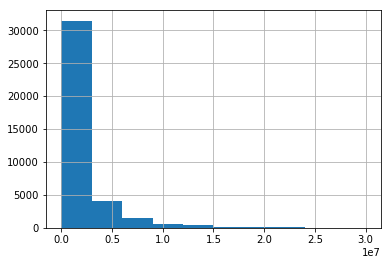

In [42]:
%matplotlib inline

salaries_college_full['salary'].hist()

plt.show()

In [84]:
# average salary of player 
salaries_college_full['salary'].groupby(salaries_college_full['schoolID']).mean().head()

schoolID
akron         8.875000e+04
alabama       1.025264e+06
albertsnid    3.325000e+05
alcalho       4.892840e+06
alchatt       3.884273e+06
Name: salary, dtype: float64

In [85]:
len(sorted(salaries_college_full['schoolID'].unique()))

690

In [86]:
#average_player_career_salary = pd.DataFrame(
len(np.array(salaries_college_full['salary'].groupby(salaries_college_full['schoolID']).mean()))
#type(average_player_career_salary)
#average_player_career_salary

690

In [109]:
schools = sorted(salaries_college_full['schoolID'].unique())
med_salary = np.array(salaries_college_full['salary'].groupby(salaries_college_full['schoolID']).median())

average_school_career_salary = pd.DataFrame({
    'med_salary': med_salary#,
    #'schoolID': schools    
}, index = schools)

average_school_career_salary.head()

,med_salary
akron,70000.0
alabama,475000.0
albertsnid,332500.0
alcalho,825000.0
alchatt,700000.0


In [113]:
med_school_salary = average_school_career_salary.sort_values('med_salary',ascending=False).head(10)

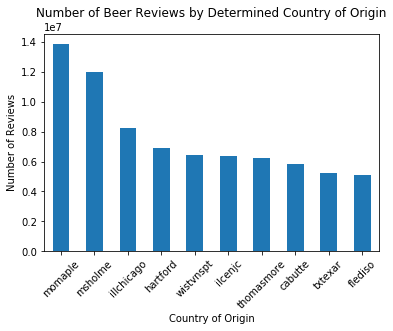

In [114]:
med_school_salary.plot(kind='bar',legend=None)
plt.xticks(rotation=45)
plt.xlabel('Country of Origin')
plt.ylabel('Number of Reviews') 
plt.title('Number of Beer Reviews by Determined Country of Origin', y=1.05)

plt.show()

In [105]:
med_school_salary['schoolID'].values

array(['momaple', 'msholme', 'illchicago', 'hartford', 'wistvnspt',
       'ilcenjc', 'thomasmore', 'cabutte', 'txtexar', 'flediso'], dtype=object)

In [83]:
#len(sorted(avg_salary_school['schoolID'].unique()))
#sorted(avg_salary_school['schoolID'].unique())
avg_salary_school['avg_salary'].groupby(salaries_college_full['schoolID']).mean()

schoolID
alfscco       9.599079e+05
arizonast     8.566608e+05
arkansas      1.385147e+06
azmescc       1.075991e+06
caantel       1.314565e+06
cafrecc       8.411735e+05
calaney       7.942537e+05
calpolypom    1.014761e+06
camirac       4.416548e+05
caorang       8.766090e+05
capierc       8.977095e+05
casacra       8.293832e+05
casbvjc       8.486470e+05
casequo       6.549763e+05
cawlajc       4.848353e+05
coloradost    1.654670e+06
deltast       1.211050e+06
flgccco       6.857042e+05
florida       1.030084e+06
flvalen       6.657802e+05
fresnost      1.064882e+06
georgiasou    1.367223e+06
houston       1.063096e+06
ilswijc       1.250536e+06
iowa          1.257622e+06
jacksonst     1.076618e+06
michigan      9.664137e+05
michiganst    7.514914e+05
montreatnc    1.047500e+06
ncat          1.620137e+06
nebomaha      7.962808e+05
newhamp       8.049385e+05
newhaven      8.175734e+05
oregonst      1.267176e+06
salabama      7.650343e+05
setonhall     9.387152e+05
sillinois     1.213

In [ ]:
schools = sorted(avg_salary_school['schoolID'].unique())
avg_salary_school = np.array(avg_salary_school['avg_salary'].groupby(salaries_college_full['schoolID']).mean())

avg_school_career_salary = pd.DataFrame({
    'avg_salary': avg_salary,
    'school': schools    
})
avg_school_career_salary.head()